In [1]:
!ls

sample_data


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [98]:
import numpy as np # linear algebra
import pandas as pd
data = pd.read_csv("./gdrive/MyDrive/sensor.csv")

In [99]:
data.shape

(220320, 51)

In [100]:
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [101]:
import numpy as np
conditions = [(data['machine_status'] =='NORMAL'), (data['machine_status'] =='BROKEN'), (data['machine_status'] =='RECOVERING')]
choices = [1, 0, 0.5]
data['Operation'] = np.select(conditions, choices, default=0)

In [102]:
df0 = pd.DataFrame(data, columns=['Operation','sensor_04', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09'])

In [103]:
df = df0
df.shape

(220320, 6)

In [104]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [105]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [106]:
df

,Operation,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09
0,1.0,634.375000,13.41146,16.13136,15.56713,15.05353
1,1.0,634.375000,13.41146,16.13136,15.56713,15.05353
2,1.0,638.888900,13.32465,16.03733,15.61777,15.01013
3,1.0,628.125000,13.31742,16.24711,15.69734,15.08247
4,1.0,636.458300,13.35359,16.21094,15.69734,15.08247
...,...,...,...,...,...,...
220315,1.0,634.722229,15.11863,16.65220,15.65393,15.16204
220316,1.0,630.902771,15.15480,16.70284,15.65393,15.11863
220317,1.0,625.925903,15.08970,16.70284,15.69734,15.11863
220318,1.0,635.648100,15.11863,16.56539,15.74074,15.11863


In [107]:
reframed = series_to_supervised(scaled, 20, 10)
reframed.head()

,var1(t-20),var2(t-20),var3(t-20),var4(t-20),var5(t-20),var6(t-20),var1(t-19),var2(t-19),var3(t-19),var4(t-19),var5(t-19),var6(t-19),var1(t-18),var2(t-18),var3(t-18),var4(t-18),var5(t-18),var6(t-18),var1(t-17),var2(t-17),var3(t-17),var4(t-17),var5(t-17),var6(t-17),var1(t-16),var2(t-16),var3(t-16),var4(t-16),var5(t-16),var6(t-16),var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var3(t+3),var4(t+3),var5(t+3),var6(t+3),var1(t+4),var2(t+4),var3(t+4),var4(t+4),var5(t+4),var6(t+4),var1(t+5),var2(t+5),var3(t+5),var4(t+5),var5(t+5),var6(t+5),var1(t+6),var2(t+6),var3(t+6),var4(t+6),var5(t+6),var6(t+6),var1(t+7),var2(t+7),var3(t+7),var4(t+7),var5(t+7),var6(t+7),var1(t+8),var2(t+8),var3(t+8),var4(t+8),var5(t+8),var6(t+8),var1(t+9),var2(t+9),var3(t+9),var4(t+9),var5(t+9),var6(t+9)
20,1.0,0.792242,0.602472,0.683630,0.638905,0.602141,1.0,0.792242,0.602472,0.683630,0.638905,0.602141,1.0,0.797904,0.598568,0.679645,0.640988,0.600405,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,...,0.599544,0.687002,0.649018,0.603299,1.0,0.792242,0.598243,0.683323,0.647531,0.602141,1.0,0.792968,0.599544,0.684856,0.644259,0.603299,1.0,0.789774,0.596942,0.683323,0.647234,0.603299,1.0,0.798340,0.606376,0.683630,0.644259,0.603299,1.0,0.800953,0.602797,0.684856,0.642474,0.600405,1.0,0.793549,0.596942,0.687002,0.669839,0.602141
21,1.0,0.792242,0.602472,0.683630,0.638905,0.602141,1.0,0.797904,0.598568,0.679645,0.640988,0.600405,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,...,0.598243,0.683323,0.647531,0.602141,1.0,0.792968,0.599544,0.684856,0.644259,0.603299,1.0,0.789774,0.596942,0.683323,0.647234,0.603299,1.0,0.798340,0.606376,0.683630,0.644259,0.603299,1.0,0.800953,0.602797,0.684856,0.642474,0.600405,1.0,0.793549,0.596942,0.687002,0.669839,0.602141,1.0,0.772642,0.594339,0.683323,0.647234,0.603299
22,1.0,0.797904,0.598568,0.679645,0.640988,0.600405,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,0.664783,0.603299,1.0,0.789193,0.596942,0.683630,...,0.599544,0.684856,0.644259,0.603299,1.0,0.789774,0.596942,0.683323,0.647234,0.603299,1.0,0.798340,0.606376,0.683630,0.644259,0.603299,1.0,0.800953,0.602797,0.684856,0.642474,0.600405,1.0,0.793549,0.596942,0.687002,0.669839,0.602141,1.0,0.772642,0.594339,0.683323,0.647234,0.603299,1.0,0.812423,0.594339,0.684856,0.650506,0.604745
23,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,0.664783,0.603299,1.0,0.789193,0.596942,0.683630,0.635039,0.604745,1.0,0.801534,0.601171,0.688535,...,0.596942,0.683323,0.647234,0.603299,1.0,0.798340,0.606376,0.683630,0.644259,0.603299,1.0,0.800953,0.602797,0.684856,0.642474,0.600405,1.0,0.793549,0.596942,0.687002,0.669839,0.602141,1.0,0.772642,0.594339,0.683323,0.647234,0.603299,1.0,0.812423,0.594339,0.684856,0.650506,0.604745,1.0,0.788758,0.604099,0.685162,0.642474,0.603299
24,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,0.664783,0.603299,1.0,0.789193,0.596942,0.683630,0.635039,0.604745,1.0,0.801534,0.601171,0.688535,0.640988,0.604745,1.0,0.796452,0.602472,0.685162,...,0.606376,0.683630,0.644259,0.603299,1.0,0.800953,0.602797,0.684856,0.642474,0.600405,1.0,0.793549,0.596942,0.687002,0.669839,0.602141,1.0,0.772642,0.594339,0.683323,0.647234,0

In [163]:
reframed.drop(reframed.columns[-10], axis=1, inplace=True)


In [164]:
reframed.head()

,var1(t-20),var2(t-20),var3(t-20),var4(t-20),var5(t-20),var6(t-20),var1(t-19),var2(t-19),var3(t-19),var4(t-19),var5(t-19),var6(t-19),var1(t-18),var2(t-18),var3(t-18),var4(t-18),var5(t-18),var6(t-18),var1(t-17),var2(t-17),var3(t-17),var4(t-17),var5(t-17),var6(t-17),var1(t-16),var2(t-16),var3(t-16),var4(t-16),var5(t-16),var6(t-16),var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var1(t+1),var1(t+2),var1(t+3),var1(t+4),var1(t+5),var1(t+6),var1(t+7),var1(t+8),var1(t+9)
20,1.0,0.792242,0.602472,0.683630,0.638905,0.602141,1.0,0.792242,0.602472,0.683630,0.638905,0.602141,1.0,0.797904,0.598568,0.679645,0.640988,0.600405,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,...,1.0,0.802260,0.599870,0.687002,0.634146,0.605035,1.0,0.787016,0.597593,0.685162,0.652290,0.603299,1.0,0.803857,0.599544,0.685162,0.640988,0.600405,1.0,0.790500,0.599544,0.687002,0.649018,0.602141,1.0,0.804728,0.599544,0.683630,0.644557,0.603299,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
21,1.0,0.792242,0.602472,0.683630,0.638905,0.602141,1.0,0.797904,0.598568,0.679645,0.640988,0.600405,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,...,1.0,0.787016,0.597593,0.685162,0.652290,0.603299,1.0,0.803857,0.599544,0.685162,0.640988,0.600405,1.0,0.790500,0.599544,0.687002,0.649018,0.602141,1.0,0.804728,0.599544,0.683630,0.644557,0.603299,1.0,0.791081,0.599544,0.685162,0.647234,0.604745,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22,1.0,0.797904,0.598568,0.679645,0.640988,0.600405,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,0.664783,0.603299,1.0,0.789193,0.596942,0.683630,...,1.0,0.803857,0.599544,0.685162,0.640988,0.600405,1.0,0.790500,0.599544,0.687002,0.649018,0.602141,1.0,0.804728,0.599544,0.683630,0.644557,0.603299,1.0,0.791081,0.599544,0.685162,0.647234,0.604745,1.0,0.782079,0.599544,0.685162,0.634146,0.604745,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,0.664783,0.603299,1.0,0.789193,0.596942,0.683630,0.635039,0.604745,1.0,0.801534,0.601171,0.688535,...,1.0,0.790500,0.599544,0.687002,0.649018,0.602141,1.0,0.804728,0.599544,0.683630,0.644557,0.603299,1.0,0.791081,0.599544,0.685162,0.647234,0.604745,1.0,0.782079,0.599544,0.685162,0.634146,0.604745,1.0,0.793549,0.602472,0.687002,0.642474,0.603299,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
24,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,0.664783,0.603299,1.0,0.789193,0.596942,0.683630,0.635039,0.604745,1.0,0.801534,0.601171,0.688535,0.640988,0.604745,1.0,0.796452,0.602472,0.685162,...,1.0,0.804728,0.599544,0.683630,0.644557,0.603299,1.0,0.791081,0.599544,0.685162,0.647234,0.604745,1.0,0.782079,0.599544,0.685162,0.634146,0.604745,1.0,0.793549,0.602472,0.687002,0.642474,0.603299,1.0,0.793549,0.599544,0.687002,0.649018,0.603299,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [212]:
reframed.head(50)

,var1(t-20),var2(t-20),var3(t-20),var4(t-20),var5(t-20),var6(t-20),var1(t-19),var2(t-19),var3(t-19),var4(t-19),var5(t-19),var6(t-19),var1(t-18),var2(t-18),var3(t-18),var4(t-18),var5(t-18),var6(t-18),var1(t-17),var2(t-17),var3(t-17),var4(t-17),var5(t-17),var6(t-17),var1(t-16),var2(t-16),var3(t-16),var4(t-16),var5(t-16),var6(t-16),var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var1(t+1),var1(t+2),var1(t+3),var1(t+4),var1(t+5),var1(t+6),var1(t+7),var1(t+8),var1(t+9)
20,1.0,0.792242,0.602472,0.683630,0.638905,0.602141,1.0,0.792242,0.602472,0.683630,0.638905,0.602141,1.0,0.797904,0.598568,0.679645,0.640988,0.600405,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,...,1.0,0.802260,0.599870,0.687002,0.634146,0.605035,1.0,0.787016,0.597593,0.685162,0.652290,0.603299,1.0,0.803857,0.599544,0.685162,0.640988,0.600405,1.0,0.790500,0.599544,0.687002,0.649018,0.602141,1.0,0.804728,0.599544,0.683630,0.644557,0.603299,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
21,1.0,0.792242,0.602472,0.683630,0.638905,0.602141,1.0,0.797904,0.598568,0.679645,0.640988,0.600405,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,...,1.0,0.787016,0.597593,0.685162,0.652290,0.603299,1.0,0.803857,0.599544,0.685162,0.640988,0.600405,1.0,0.790500,0.599544,0.687002,0.649018,0.602141,1.0,0.804728,0.599544,0.683630,0.644557,0.603299,1.0,0.791081,0.599544,0.685162,0.647234,0.604745,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22,1.0,0.797904,0.598568,0.679645,0.640988,0.600405,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,0.664783,0.603299,1.0,0.789193,0.596942,0.683630,...,1.0,0.803857,0.599544,0.685162,0.640988,0.600405,1.0,0.790500,0.599544,0.687002,0.649018,0.602141,1.0,0.804728,0.599544,0.683630,0.644557,0.603299,1.0,0.791081,0.599544,0.685162,0.647234,0.604745,1.0,0.782079,0.599544,0.685162,0.634146,0.604745,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23,1.0,0.784402,0.598243,0.688535,0.644259,0.603299,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,0.664783,0.603299,1.0,0.789193,0.596942,0.683630,0.635039,0.604745,1.0,0.801534,0.601171,0.688535,...,1.0,0.790500,0.599544,0.687002,0.649018,0.602141,1.0,0.804728,0.599544,0.683630,0.644557,0.603299,1.0,0.791081,0.599544,0.685162,0.647234,0.604745,1.0,0.782079,0.599544,0.685162,0.634146,0.604745,1.0,0.793549,0.602472,0.687002,0.642474,0.603299,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
24,1.0,0.794855,0.599870,0.687002,0.644259,0.603299,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.603448,0.683630,0.642474,0.603299,1.0,0.787596,0.595315,0.683323,0.664783,0.603299,1.0,0.789193,0.596942,0.683630,0.635039,0.604745,1.0,0.801534,0.601171,0.688535,0.640988,0.604745,1.0,0.796452,0.602472,0.685162,...,1.0,0.804728,0.599544,0.683630,0.644557,0.603299,1.0,0.791081,0.599544,0.685162,0.647234,0.604745,1.0,0.782079,0.599544,0.685162,0.634146,0.604745,1.0,0.793549,0.602472,0.687002,0.642474,0.603299,1.0,0.793549,0.599544,0.687002,0.649018,0.603299,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25,1.0,0.796307,0.602472,0.685162,0.652290,0.606482,1.0,0.790935,0.60344

In [214]:
values = reframed.values
n_train_time = 150000
train = values[:n_train_time, :]
test = values[n_train_time:, :]



In [215]:
train.shape, test.shape

((150000, 130), (63808, 130))

In [216]:
train_x, train_y = train[:, :-10], train[:, 120:130]
test_x, test_y = test[:60000, :-10], test[:60000, 120:130]

In [217]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((150000, 120), (150000, 10), (60000, 120), (60000, 10))

In [218]:
train_x = train_x.reshape((train_x.shape[0], 120, 1))
test_x = test_x.reshape((test_x.shape[0], 120, 1))

In [219]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((150000, 120, 1), (150000, 10), (60000, 120, 1), (60000, 10))

In [221]:
train_y[2]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Epoch 1/10
4688/4688 - 30s - loss: 0.0083 - val_loss: 3.8332e-04
Epoch 2/10
4688/4688 - 28s - loss: 0.0051 - val_loss: 2.9974e-04
Epoch 3/10
4688/4688 - 28s - loss: 0.0058 - val_loss: 2.9103e-04
Epoch 4/10
4688/4688 - 28s - loss: 0.0053 - val_loss: 2.4793e-04
Epoch 5/10
4688/4688 - 28s - loss: 0.0048 - val_loss: 4.1851e-04
Epoch 6/10
4688/4688 - 28s - loss: 0.0044 - val_loss: 3.2004e-04
Epoch 7/10
4688/4688 - 28s - loss: 0.0048 - val_loss: 2.7885e-04
Epoch 8/10
4688/4688 - 28s - loss: 0.0027 - val_loss: 2.6617e-04
Epoch 9/10
4688/4688 - 28s - loss: 0.0028 - val_loss: 3.2441e-04
Epoch 10/10
4688/4688 - 28s - loss: 0.0022 - val_loss: 2.6563e-04


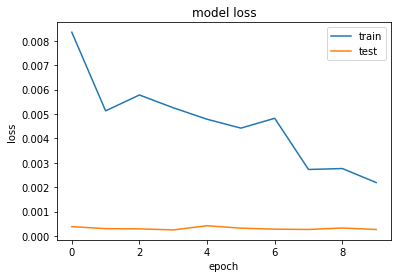

In [222]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(10))   # final layer should have neurons upto how many time steps we want to predict
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [223]:
test_x.shape

(60000, 120, 1)

In [224]:
test_x[1].shape

(120, 1)

In [248]:
yhat = model.predict(test_x[9965].reshape(1, 120, 1))

In [249]:
yhat

array([[0.97827667, 0.97849536, 0.9787509 , 0.97888565, 0.979181  ,
        0.97952104, 0.97973084, 0.9800415 , 0.98029244, 0.98057854]],
      dtype=float32)

In [250]:
test_y[9965]

array([1. , 1. , 1. , 1. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5])

In [237]:
df8 = pd.DataFrame(test_y)

In [242]:
df8

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
59995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
59996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
59997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
59998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [243]:
rslt_df = df8.loc[df8[0] < 0.9]


In [244]:
rslt_df

,0,1,2,3,4,5,6,7,8,9
9969,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
9970,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
9971,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
9972,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
9973,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...
10040,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,1.0
10041,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0
10042,0.5,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10043,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
